In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import seaborn as sns

In [ ]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip


--2021-08-01 15:24:31--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.124.214
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.124.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1061576029 (1012M) [binary/octet-stream]
Saving to: ‘dataset52a7b21.zip’

dataset52a7b21.zip  100%[===================>]   1012M  14.5MB/s    in 73s     

2021-08-01 15:25:45 (13.9 MB/s) - ‘dataset52a7b21.zip’ saved [1061576029/1061576029]



In [ ]:
!unzip dataset52a7b21.zip

Archive:  dataset52a7b21.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/.~lock.train.csv#  


In [ ]:
train = pd.read_csv("dataset/train.csv",escapechar = "\\",quoting = csv.QUOTE_NONE)
test = pd.read_csv("dataset/test.csv",escapechar = "\\",quoting = csv.QUOTE_NONE)

In [ ]:
train.shape, test.shape

((2903024, 5), (110775, 5))

In [ ]:
train

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4
...,...,...,...,...,...
2903019,Premium Aviator Sunglasses - HD Polarized (Bri...,These premium Aviator Sunglasses with 5 color ...,"[Frame size: Lens height - 56mm, Lens width - ...",Generic,1040
2903020,Social Distance Stickers - Set of 5 Sticker Sl...,set of 5 prints social distancing sticker self...,[covid19 safety sticker - set of 5 to maintain...,Generic,15199
2903021,Torr-to Face Shield PACK OF 5 with Adjustable ...,* COMPLETE FACE PROTECTION: Torr-to Face Shiel...,"[350 MICRONS PACK OF 5 PCS,COMPLETE FACE PROTE...",TORR-TO,1044933
2903022,Type-C to 3.5 MM for Oppo R17 Pro Type-C to 3....,Still want to use your favorite earphones/head...,"[Indian Connectors: Made for Indian sockets, t...",SHOPBELL,14790


In [ ]:
test

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero
...,...,...,...,...,...
110770,110771,AAHNA E MALL OneBlade Hybrid Trimmer Shaver An...,<p>1-All In One Hyper Advanced Smart Rechargea...,"[Unique One Blade can style, trim and shave, w...",Generic
110771,110772,Grin Health N99 Anti Pollution Reusable Washab...,"<p>SIZE GUIDE : M - (35- 65 Kg), L - (49- 72 K...",[PROTECTION: Filtration rate up to ≥99 percent...,Grin Health
110772,110773,Asian Army Pink Ultra reusable respirator clot...,Asian HyperProtect A95 masks have been enginee...,[Reusable and environment friendly: These mask...,ASIAN
110773,110774,IM Safe 3 Ply Non-Woven Disposable Surgical Fa...,This 3 Ply Disposable face mask is manufacture...,[3 Ply Mask: Genuine 3 Ply Mask. 25 GSM Spun B...,Intermarket


# WORKING WITH TRAIN



In [ ]:
train.isnull().sum()

TITLE                 71
DESCRIPTION       723664
BULLET_POINTS     166263
BRAND              56737
BROWSE_NODE_ID         0
dtype: int64

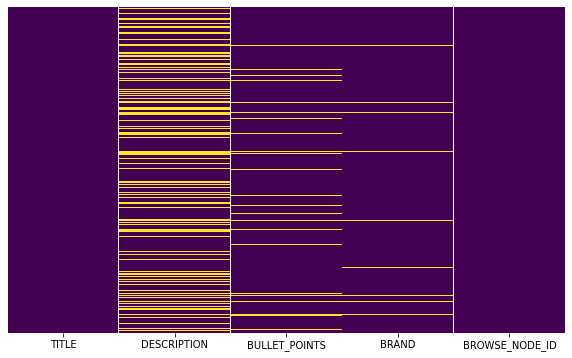

In [ ]:
#heatmap showing the distribution of all the Nan's throughout the data
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')
# About 25% of description is NULL

In [ ]:
#TRYING BY REMOVING NULL VALUES
train = train[train['DESCRIPTION'].notna()]
train = train[train['BULLET_POINTS'].notna()]
train = train[train['BRAND'].notna()]
train = train.reset_index(drop=True)

In [ ]:
train.shape

(2110641, 5)

# MAKING A SMALL DATASET FROM train TO WORK 


In [ ]:
#Creating a temporary small Dataframe - Crashing Everytime
temp_train = train.sample(n = 110775)  #Taking random 50k 
temp_train.shape

(110775, 5)

In [ ]:
temp_train

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
1449482,Maxwest Orbit Z50 Compatible Bluetooth Capsule...,Play the audio through Bluetooth Version V3.0 ...,[Supports Wireless Music Streaming via New Blu...,Celltool,1966
1840728,EDGELEC 100pcs 360 ohm Resistor 1/4w (0.25 Wat...,<b>100pcs - 360 ohm - 0.25 Watt (1/4W) Metal F...,[Metal Film Resistor: Excellent Noise Suppress...,EDGELEC,6191
1793974,Younky Sunglasses for Men's And Boy's With Blu...,Younky Sunglasses for Men's And Boy's With Blu...,[Younky Latest Combo offer of Sunglasses for M...,Younky,16033
1172304,TP-LINK Archer T8E AC1750 Dual Band Wireless P...,TP-LINK ARCHER T8E AC1750 Dual-Band Wireless P...,"[TP-LINK,Original Product]",TP-Link,1198
918014,YOTOVA Redmita Stylish Latest Design Sling Han...,YOTOVA is offering you a ladies handbag. It is...,"[Material-PU, Inner Material- Polyester, Color...",YOTOVA,1072
...,...,...,...,...,...
1876123,Ywoow Unisex Baby Winter Earmuffs Winter Ear W...,<br>Unisex Baby Winter Earmuffs Winter Ear War...,[✡ cute toddler baby girls clothes set long sl...,Ywoow,1239
2085754,Uniq Green with White Color Marble Pebbles (10...,Gravels are one of the most important part of ...,"[material:-colored marble,Color:- Green With W...",uniq world wide,97741
1800523,Case Creation Retro Army Green 3D Military Cam...,<ul>Why Choose <b>Case Creation?</b><br><br><l...,[3D RELIEF ARMY STYLING SERIES - Comfortable t...,Case Creation,1045
1236228,Zeneme Dancing Peacock American Diamond Bangle...,Zeneme welcomes you to the world of designer j...,"[American Diamond Bangles,Bangles For Wedding ...",ZENEME,396


In [ ]:
temp_train = temp_train.reset_index(drop=True)
temp_train

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,Maxwest Orbit Z50 Compatible Bluetooth Capsule...,Play the audio through Bluetooth Version V3.0 ...,[Supports Wireless Music Streaming via New Blu...,Celltool,1966
1,EDGELEC 100pcs 360 ohm Resistor 1/4w (0.25 Wat...,<b>100pcs - 360 ohm - 0.25 Watt (1/4W) Metal F...,[Metal Film Resistor: Excellent Noise Suppress...,EDGELEC,6191
2,Younky Sunglasses for Men's And Boy's With Blu...,Younky Sunglasses for Men's And Boy's With Blu...,[Younky Latest Combo offer of Sunglasses for M...,Younky,16033
3,TP-LINK Archer T8E AC1750 Dual Band Wireless P...,TP-LINK ARCHER T8E AC1750 Dual-Band Wireless P...,"[TP-LINK,Original Product]",TP-Link,1198
4,YOTOVA Redmita Stylish Latest Design Sling Han...,YOTOVA is offering you a ladies handbag. It is...,"[Material-PU, Inner Material- Polyester, Color...",YOTOVA,1072
...,...,...,...,...,...
110770,Ywoow Unisex Baby Winter Earmuffs Winter Ear W...,<br>Unisex Baby Winter Earmuffs Winter Ear War...,[✡ cute toddler baby girls clothes set long sl...,Ywoow,1239
110771,Uniq Green with White Color Marble Pebbles (10...,Gravels are one of the most important part of ...,"[material:-colored marble,Color:- Green With W...",uniq world wide,97741
110772,Case Creation Retro Army Green 3D Military Cam...,<ul>Why Choose <b>Case Creation?</b><br><br><l...,[3D RELIEF ARMY STYLING SERIES - Comfortable t...,Case Creation,1045
110773,Zeneme Dancing Peacock American Diamond Bangle...,Zeneme welcomes you to the world of designer j...,"[American Diamond Bangles,Bangles For Wedding ...",ZENEME,396


In [ ]:
#creating a list of all the unique BRAND names
brands = list(dict.fromkeys(list(temp_train.loc[:, 'BRAND'].values)))
brand_keys = []
brand_freq = [] 

for brand in brands:
  count = np.sum(temp_train.loc[:, 'BRAND'].values == brand)
  if count>=10:
    brand_keys.append(brand)
    brand_freq.append(count)

In [ ]:
plt.figure(figsize=(30,8))
plt.title("Brand vs Frequency of Products", fontsize=32)
plt.ylabel("Number of Products of that Brand", fontsize=20)
plt.xlabel("Name of the Brand", fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=24)
sns.lineplot(x=brand_keys, y=brand_freq)
plt.show()

## Cleaning DESCRIPTION

In [ ]:
#Cleaning 
from collections import Counter
from string import ascii_letters, punctuation, digits

corpus = ' '.join(temp_train['DESCRIPTION']).lower()
characters = Counter(corpus)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
  total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(temp_train['DESCRIPTION']))))
print("\n")
print(characters)

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
import re
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}
custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
wordnet_lemmatizer = WordNetLemmatizer()

def clean(text):
  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")

    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    
    text[i] = re.sub("[a-z]'[a-z]+"," ",text[i])
    text[i] = re.sub(' +',' ',text[i])  #Removing whitespaces
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i]) #Removing emoticons,and other languages
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])  #Removing URL's
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])  #Handling numbers
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in  custom_stopwords])
    text[i] = re.sub(r'[^\w\s]','',text[i]) #REmoving Punctuations
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]   #Lemmatization
    text[i] = [word for word in text[i] if len(word)>=3]  #Removing words which have less than 3 letters
  return text

RAW_DESCRIPTION = temp_train['DESCRIPTION'].tolist()
CLEAN_DESCRIPTION = clean(RAW_DESCRIPTION)
print(CLEAN_DESCRIPTION[:10])

In [ ]:
corpus = []
for text in CLEAN_DESCRIPTION:
  for word in text:
    corpus.append(word)

counter = Counter(corpus)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
  if (word not in custom_stopwords):
    x.append(word)
    y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)            
sns.barplot(x=x,y=y)

In [ ]:
temp_clean_description = [" ".join(sentence) for sentence in CLEAN_DESCRIPTION]
temp_train["DESCRIPTION"] = temp_clean_description                              #Replaced the Raw description with the clean description.
temp_train

# TEST 


In [ ]:
test

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero
...,...,...,...,...,...
110770,110771,AAHNA E MALL OneBlade Hybrid Trimmer Shaver An...,<p>1-All In One Hyper Advanced Smart Rechargea...,"[Unique One Blade can style, trim and shave, w...",Generic
110771,110772,Grin Health N99 Anti Pollution Reusable Washab...,"<p>SIZE GUIDE : M - (35- 65 Kg), L - (49- 72 K...",[PROTECTION: Filtration rate up to ≥99 percent...,Grin Health
110772,110773,Asian Army Pink Ultra reusable respirator clot...,Asian HyperProtect A95 masks have been enginee...,[Reusable and environment friendly: These mask...,ASIAN
110773,110774,IM Safe 3 Ply Non-Woven Disposable Surgical Fa...,This 3 Ply Disposable face mask is manufacture...,[3 Ply Mask: Genuine 3 Ply Mask. 25 GSM Spun B...,Intermarket


In [ ]:
test.isnull().sum()

PRODUCT_ID           0
TITLE                7
DESCRIPTION      10469
BULLET_POINTS     6786
BRAND             2430
dtype: int64

In [ ]:
test = test[test['DESCRIPTION'].notna()]
test = test[test['BULLET_POINTS'].notna()]
test = test[test['BRAND'].notna()]
test = test.reset_index(drop=True)

In [ ]:
test.shape

(97800, 5)

In [ ]:
temp_test = test.sample(n = 4000)  
temp_test = temp_test.reset_index(drop=True)
temp_test.shape

(4000, 5)

In [ ]:
#Cleaning 
from collections import Counter
from string import ascii_letters, punctuation, digits

corpus = ' '.join(temp_test['DESCRIPTION']).lower()
characters = Counter(corpus)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
  total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(temp_test['DESCRIPTION']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 84.4847099586807.


Counter({' ': 390165, 'e': 214339, 't': 161502, 'a': 153693, 'o': 148290, 'i': 139928, 'r': 139593, 's': 131327, 'n': 120237, 'l': 90553, 'c': 80872, 'h': 71944, 'd': 71275, 'p': 65412, 'u': 60479, 'm': 50588, 'b': 45924, 'f': 44938, 'g': 44445, 'y': 38012, 'w': 27409, '>': 27125, '<': 27098, '.': 25586, 'v': 20062, ',': 18941, 'k': 17269, '/': 16259, ':': 9660, '-': 7604, '1': 7138, 'x': 6586, '0': 5939, '2': 4646, '3': 3552, '5': 3364, 'z': 3297, 'q': 3269, '4': 2819, '&': 2738, '#': 2294, '6': 2289, ';': 2266, 'j': 2116, '8': 1791, ')': 1762, '(': 1659, "'": 1593, '7': 1478, '9': 1473, '*': 1275, '"': 1110, '!': 709, '\\': 654, '%': 577, '\xa0': 342, '’': 339, '+': 327, '?': 282, '—': 278, '|': 152, '=': 124, '°': 94, '”': 82, '“': 74, '–': 68, '~': 66, '✔': 65, '[': 60, ']': 60, '️': 50, '：': 46, '★': 44, '◆': 44, '❀': 44, '❤': 43, '\xad': 40, '·': 38, '℃': 36, '✅': 33, '_': 31, '×': 31, '💌': 30, '☆': 28, '‘

In [ ]:
import re
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}
custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
wordnet_lemmatizer = WordNetLemmatizer()

def clean(text):
  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")

    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    
    text[i] = re.sub("[a-z]'[a-z]+"," ",text[i])
    text[i] = re.sub(' +',' ',text[i])  #Removing whitespaces
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i]) #Removing emoticons,and other languages
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])  #Removing URL's
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])  #Handling numbers
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in  custom_stopwords])
    text[i] = re.sub(r'[^\w\s]','',text[i]) #REmoving Punctuations
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]   #Lemmatization
    text[i] = [word for word in text[i] if len(word)>=3]  #Removing words which have less than 3 letters
  return text

RAW_DESCRIPTION = temp_test['DESCRIPTION'].tolist()
CLEAN_DESCRIPTION = clean(RAW_DESCRIPTION)
print(CLEAN_DESCRIPTION[:10])

[['featuresbr', 'flexible', 'durable', 'soft', 'tpu', 'hard', 'material', 'hybrid', 'armor', 'defender', 'cover', 'builtin', 'stand', 'free', 'hand', 'viewing', 'readingbr', 'rugged', 'tpu', 'construction', 'allows', 'ultimate', 'tanklike', 'protection', 'shockabsorbencybr', 'precise', 'opening', 'allow', 'easy', 'access', 'button', 'port', 'without', 'removing', 'casebr', 'added', 'protection', 'scratch', 'shock', 'dust', 'brpackaging', 'include', 'case', 'samsung', 'galaxy', 'pro', 'galaxy', 'grand', 'prime', 'progalaxy', 'phone', 'supplied'], ['smart', 'synthetic', 'rich', 'leather', 'wallet', 'cover', 'must', 'accessory', 'mobile', 'wallet', 'feature', 'unique', 'way', 'get', 'full', 'optimization', 'mobile', 'get', 'convenience', 'card', 'pocket', 'cash', 'pocket', 'used', 'carry', 'card', 'cash', 'seamlessly', 'front', 'wallet', 'card', 'holder', 'rotated', 'use', 'carry', 'card', 'smart', 'cover', 'protect', 'mobile', 'impact', 'use', 'camera', 'flash', 'speaker', 'fingerprint',

In [ ]:
temp_clean_description = [" ".join(sentence) for sentence in CLEAN_DESCRIPTION]
temp_test["DESCRIPTION"] = temp_clean_description
temp_test

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,22623,"BINGRAN Galaxy J2 Pro 2018 Case, Hybrid Hard P...",featuresbr flexible durable soft tpu hard mate...,[Compatibility: 100% Brand new case for Samsun...,BINGRAN
1,8133,Acm Wallet Leather Flip Carry Case Compatible ...,smart synthetic rich leather wallet cover must...,"[Rich Leather Flip Flap Cover,Wallet Mobile Ca...",ACM
2,40431,Romano nx Women's Rain Skirt and Rain Jacket P...,product made blended finished attractive trans...,"[Material: Blended,Color: Red,Closure: Buttone...",Romano
3,96409,Gowind-in Women's PU Leather Bowknot 3 Pieces ...,new woman leather bowknot backpack school bag ...,[Backpack ♥ Size: Approx. 280x240x110mm/11.02x...,Gowind-in
4,57911,Jackly 6032-A Combination Screwdriver Set,general brand jackly model number type combina...,[All in one compact pocket-sized case for easy...,Jackly
...,...,...,...,...,...
3995,10716,Angel's Fashion Girl's Rayon Fabric Off-Should...,get stylish offshoulder mustard color rayon fa...,[This off shoulder top is made of fine rayon f...,Angel's Fashion
3996,65302,Rose Kids Unisex Woolen Beanie Cap with Tie Kn...,rose present cap little one add styling factor...,"[Suitable for 1 - 5 Years,Ear Flaps for extra ...",Unknown
3997,9045,"NIMKOS Refrigerator Cover, Handle Cover and Ma...",key feature product fridge top come utility po...,[Content - 3 pieces of mat and Fridge Top Cove...,NIMKOS
3998,110732,ELECTROPRIME K-21 256GB Cartoon High Speed Sho...,electroprime cartoon high speed shockproof dis...,"[Condition- New,Package includes- 1 pcs only,F...",ELECTROPRIME


In [ ]:
#DROPPING PRODUCT ID COLUMN 
save_product = test['PRODUCT_ID']
test.drop(columns='PRODUCT_ID', inplace = True)


# Lets Try Some Model

In [ ]:
temp_train

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,Maxwest Orbit Z50 Compatible Bluetooth Capsule...,Play the audio through Bluetooth Version V3.0 ...,[Supports Wireless Music Streaming via New Blu...,Celltool,1966
1,EDGELEC 100pcs 360 ohm Resistor 1/4w (0.25 Wat...,<b>100pcs - 360 ohm - 0.25 Watt (1/4W) Metal F...,[Metal Film Resistor: Excellent Noise Suppress...,EDGELEC,6191
2,Younky Sunglasses for Men's And Boy's With Blu...,Younky Sunglasses for Men's And Boy's With Blu...,[Younky Latest Combo offer of Sunglasses for M...,Younky,16033
3,TP-LINK Archer T8E AC1750 Dual Band Wireless P...,TP-LINK ARCHER T8E AC1750 Dual-Band Wireless P...,"[TP-LINK,Original Product]",TP-Link,1198
4,YOTOVA Redmita Stylish Latest Design Sling Han...,YOTOVA is offering you a ladies handbag. It is...,"[Material-PU, Inner Material- Polyester, Color...",YOTOVA,1072
...,...,...,...,...,...
110770,Ywoow Unisex Baby Winter Earmuffs Winter Ear W...,<br>Unisex Baby Winter Earmuffs Winter Ear War...,[✡ cute toddler baby girls clothes set long sl...,Ywoow,1239
110771,Uniq Green with White Color Marble Pebbles (10...,Gravels are one of the most important part of ...,"[material:-colored marble,Color:- Green With W...",uniq world wide,97741
110772,Case Creation Retro Army Green 3D Military Cam...,<ul>Why Choose <b>Case Creation?</b><br><br><l...,[3D RELIEF ARMY STYLING SERIES - Comfortable t...,Case Creation,1045
110773,Zeneme Dancing Peacock American Diamond Bangle...,Zeneme welcomes you to the world of designer j...,"[American Diamond Bangles,Bangles For Wedding ...",ZENEME,396


In [ ]:
temp_test

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,22623,"BINGRAN Galaxy J2 Pro 2018 Case, Hybrid Hard P...",featuresbr flexible durable soft tpu hard mate...,[Compatibility: 100% Brand new case for Samsun...,BINGRAN
1,8133,Acm Wallet Leather Flip Carry Case Compatible ...,smart synthetic rich leather wallet cover must...,"[Rich Leather Flip Flap Cover,Wallet Mobile Ca...",ACM
2,40431,Romano nx Women's Rain Skirt and Rain Jacket P...,product made blended finished attractive trans...,"[Material: Blended,Color: Red,Closure: Buttone...",Romano
3,96409,Gowind-in Women's PU Leather Bowknot 3 Pieces ...,new woman leather bowknot backpack school bag ...,[Backpack ♥ Size: Approx. 280x240x110mm/11.02x...,Gowind-in
4,57911,Jackly 6032-A Combination Screwdriver Set,general brand jackly model number type combina...,[All in one compact pocket-sized case for easy...,Jackly
...,...,...,...,...,...
3995,10716,Angel's Fashion Girl's Rayon Fabric Off-Should...,get stylish offshoulder mustard color rayon fa...,[This off shoulder top is made of fine rayon f...,Angel's Fashion
3996,65302,Rose Kids Unisex Woolen Beanie Cap with Tie Kn...,rose present cap little one add styling factor...,"[Suitable for 1 - 5 Years,Ear Flaps for extra ...",Unknown
3997,9045,"NIMKOS Refrigerator Cover, Handle Cover and Ma...",key feature product fridge top come utility po...,[Content - 3 pieces of mat and Fridge Top Cove...,NIMKOS
3998,110732,ELECTROPRIME K-21 256GB Cartoon High Speed Sho...,electroprime cartoon high speed shockproof dis...,"[Condition- New,Package includes- 1 pcs only,F...",ELECTROPRIME


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
def k_nearest_neighbours(x,y):
  from sklearn.neighbors import KNeighborsClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  knn_model = KNeighborsClassifier(algorithm='brute')
  knn_model.fit(x_train,y_train)
  knn_predict = knn_model.predict(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",100*accuracy_score(y_test, knn_predict))

  # print("\n")
  # print("*********** CONFUSION MATRIX **************")
  # print(confusion_matrix(y_test, knn_predict))

  # print("\n")
  # print("*********** CLASSIFICATION REPORT **************")
  # print(classification_report(y_test, knn_predict))

  return y_test, knn_predict

In [ ]:
print("********** K NEAREST NEIGHBOURS *************")
x = temp_train['BRAND']             # String
y = temp_train['BROWSE_NODE_ID']    # int

y_test, knn_predict = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************


In [ ]:
knn_predict.shape

(3400,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

x = temp_train['BRAND']             # String
y = temp_train['BROWSE_NODE_ID']    # int

#bag of words implmentation
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()
#TF-IDF implementation
vector = TfidfTransformer()
x = vector.fit_transform(x).toarray()

model.fit(x,y)

In [ ]:
z = test['BRAND']
#bag of words implmentation
cv = CountVectorizer()
z = cv.fit_transform(z).toarray()
#TF-IDF implementation
vector = TfidfTransformer()
z = vector.fit_transform(z).toarray()

result = model.predict(z)

In [ ]:
result = knn_predict

In [ ]:
result.shape

(3400,)

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 8.7 MB/s 


In [ ]:
#SAVING FORMAT
import xlsxwriter
df=pd.DataFrame({'BROWSE_NODE_ID':result})
writer=pd.ExcelWriter('mount_coders_submission.xlsx',engine='xlsxwriter')
df.to_excel(writer,index=False,sheet_name='first')
writer.save()

In [ ]:
check = pd.read_excel("mount_coders_submission.xlsx")
check

,BROWSE_NODE_ID
0,449
1,558
2,42
3,912
4,1267
...,...
3395,1267
3396,149
3397,1045
3398,3711


In [ ]:
data=[]
for i in range(1,3401):
  data.append(i)

In [ ]:
check.insert(0,'PRODUCT_ID',data)

In [ ]:
check.shape

(3400, 2)

In [ ]:
type(check)

pandas.core.frame.DataFrame

In [ ]:
check.to_csv('submission.csv')

In [ ]:
#The answer needed -> Product_ID | Browse_Node_Id

# Product_Id -> save_product
# Browse_NOde_id -> result
# output -> save_product | result
